#### Team Project 01 by 김동화, 최민혁
# 대륙별 코로나 사망률과 완치률

cf. 사망률 = 사망자수/확진자수, 완치률 = 완치자수/확진자수

## 목표
대륙별 코로나 사망률과 완치율 시각화
#### 참조 링크
1) 코로나 실시간 상황판 [링크](https://coronaboard.kr/)  
2) 대륙별 나라 목록 [링크](https://ko.wikipedia.org/wiki/%EB%8C%80%EB%A5%99%EB%B3%84_%EB%82%98%EB%9D%BC_%EB%AA%A9%EB%A1%9D)

## 과정
- 주요 라이브러리 : `selenium` `bs4` `pandas`  

1. *1) 사이트*에서 국가별 코로나 사망률과 완치율 정보를 가져온다  
2. *2) 사이트*에서 국가 이름과 그 국가가 속한 대륙 이름을 가져온다.  
3. 국가별 사망률과 완치율, 국가가 속한 대륙 이름을 DataFrame으로 묶는다.  
4. 대륙별로 평균 사망률과 완치율의 평균을 구한다.  
5. 시각화한다.

## 결과

result.png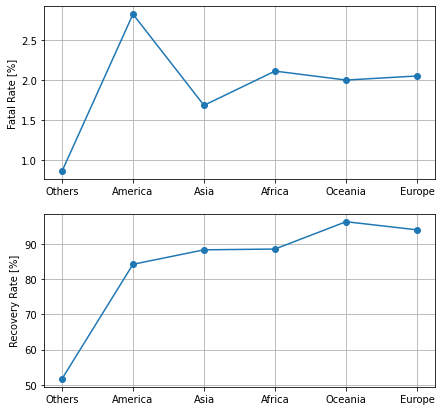

## 해석 및 향후 개성 사항
- 아프리카, 오세아니아, 유럽은 비슷한 수준의 사망률을 보인다.
- 아메리카는 다른 대륙에 비해 높은 사망률을 보인다. 북아메리카의 미국과 캐나다의 사망률이 1.8과 1.9인 것에 비해서 다소 높은 수치가 나왔기 때문에 어떠한 이유에서 이러한 결과가 나왔는지 살펴볼 필요가 있다. 특정 국가의 사망률이 높은 건지, 골고루 높은 건지 등 분포를 알기 위해서 분산을 계산해보면 좋을 것 같다.
- 그 외에 속한 나라들을 보면 속국이 많다. 소속국가인 프랑스보다 훨씬 더 낮은 완치률을 보이는 것을 알 수 있다. 완치률에 영향을 주는 여러 요인이 있겠지만 의료시설이 잘 되어있지 않다는 유추해볼 수 있다. 이들 국가에 대한 정보를 찾아보면 더 정확한 해석이 가능할 것 같다.
- 사망률과 완치율의 음의 상관계수를 계산해보면 좋을 것 같다. 시각화 결과를 통해서는 사망률이 높을수록 완치율이 낮다는 것을 정확하게 확인하기는 어려웠다.



### 1. 국가별 코로나 사망률, 완치율 (by 김동화)
임동조 강사님 unit08_corona_01_today 파일 참고


In [6]:
from IPython.display import display, Image 
import os, warnings
import re
warnings.filterwarnings(action= 'ignore')

In [114]:
# 필수
from selenium import webdriver 
from bs4 import BeautifulSoup
import time

from selenium.webdriver import ActionChains
import pandas as pd
import matplotlib.pyplot as plt

#### 1) 웹 드라이버 객체 할당 및 크롤링할 웹 페이지 띄우기

In [16]:
driver = webdriver.Chrome("../chromedriver")
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="2e76ab12a60836885a55389d4a0e2e96")>

In [17]:
corona_url = 'https://coronaboard.kr/'
driver.get(corona_url)

In [18]:
# 더보기 버튼 끝까지 누르기
xpath_btn = '//*[@id="show-more"]'
cnt = 0
while True:
    try :
        sel_btn = driver.find_element_by_xpath(xpath_btn)
        sel_btn.click()
        cnt += 1
    except :
        print("더보기 버튼을 %d번 눌렀습니다."%cnt)
        break

더보기 버튼을 2번 눌렀습니다.


#### 2) 웹 페이지 html 가져오기

In [19]:
page = driver.page_source
soup = BeautifulSoup(page, 'html.parser')
soup.title

<title>코로나19(COVID-19) 실시간 상황판</title>

#### 3) 원하는 정보 가져오기
- 전체 테이블 지정

In [47]:
table = soup.select("tbody > tr")
table[0] # index : 0~220

<tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">1</td><td class="google-visualization-table-td" colspan="1"><a href="https://coronaboard.com" target="_blank">미국🇺🇸</a></td><td class="google-visualization-table-type-number google-visualization-table-td" colspan="1">34,419,838<br/><span class="red diff">(+13,779)</span></td><td class="google-visualization-table-type-number google-visualization-table-td" colspan="1">617,463<br/><span class="red diff">(+297)</span></td><td class="google-visualization-table-type-number google-visualization-table-td" colspan="1">28,767,507<br/><span class="green diff">(+56,191)</span></td><td class="google-visualization-table-type-number google-visualization-table-td" colspan="1">1.8</td><td class="google-visualization-table-type-number google-visualization-table-td" colspan="1">83.6</td><td class="google-visualization-table-type-number google-visualization-table-td" colspan="1">103,987</

#### 3-1) 한 개의 국가만 가져오기 [test]
- 국가  
<U>이름에 링크가 있는 국가</U>(예.미국)와 <U>없는 국가</U>(예.인도)의 html 구성이 달라서 BeautifulSoup으로 동일한 항목을 뽑아내기 어려웠다. selenium의 xpath을 이용해서 찾았다. 

In [96]:
# selenium
sel_country = driver.find_elements_by_xpath('//*[@id="country-table"]/div/div/table/tbody/tr/td[2]') 
sel_country[0].text # index : 0~220 

'미국🇺🇸'

In [94]:
# BeautifulSoup
america = table[0]
print(america.a.text)

india = table[1]
print(india.find_all("td",class_="google-visualization-table-td")[1].text)

미국🇺🇸
인도🇮🇳


- 확진자, 사망자, 완치자, 치명률, 완치률, 발생률  
cf. 발생률 = 100만명당 발생률 (=확진자/인구수*1,000,000)

In [61]:
num_tag = one.find_all("td", class_="google-visualization-table-type-number google-visualization-table-td")
print(num_tag[0].text) # 확진자
print(num_tag[1].text) # 사망자
print(num_tag[2].text) # 완치자
print(num_tag[3].text) # 치명률
print(num_tag[4].text) # 완치률
print(num_tag[5].text) # 발생률


34,419,838(+13,779)
617,463(+297)
28,767,507(+56,191)
1.8
83.6
103,987


#### 3-2) 모든 국가 가져오기

In [109]:
table = soup.select("tbody > tr")

all_data = []
for n in range(221) :
    row_data = []
    
    # 국가
    sel_country = driver.find_elements_by_xpath('//*[@id="country-table"]/div/div/table/tbody/tr/td[2]') 
    row_data.append(sel_country[n].text) 
    
    # 확진자, 사망자, 완치자, 치명률, 완치률, 발생률
    one = table[n]
    num_tag = one.find_all("td", class_="google-visualization-table-type-number google-visualization-table-td")
    for i in range(6): 
        row_data.append(num_tag[i].text) 
    
    all_data.append(row_data)
    
all_data

[['미국🇺🇸',
  '34,419,838(+13,779)',
  '617,463(+297)',
  '28,767,507(+56,191)',
  '1.8',
  '83.6',
  '103,987'],
 ['인도🇮🇳',
  '29,977,861(+12,569)',
  '389,302(+474)',
  '28,926,038(+30,862)',
  '1.3',
  '96.5',
  '21,723'],
 ['브라질🇧🇷',
  '17,969,806(+41,878)',
  '502,817(+899)',
  '16,288,392(+68,154)',
  '2.8',
  '90.6',
  '84,540'],
 ['프랑스🇫🇷',
  '5,757,798(+487)',
  '110,778(+40)',
  '5,566,394(+9,808)',
  '1.9',
  '96.7',
  '88,210'],
 ['터키🇹🇷',
  '5,375,593(+5,294)',
  '49,236(+51)',
  '5,237,731(+5,093)',
  '0.9',
  '97.4',
  '63,738'],
 ['러시아🇷🇺',
  '5,350,919(+16,715)',
  '130,347(+546)',
  '4,889,450(+11,117)',
  '2.4',
  '91.4',
  '36,667'],
 ['영국🇬🇧',
  '4,640,507(+10,467)',
  '127,981(+5)',
  '4,303,996(+2,011)',
  '2.8',
  '92.7',
  '68,357'],
 ['아르헨티나🇦🇷',
  '4,277,395(+8,606)',
  '89,490(+447)',
  '3,910,835(+20,622)',
  '2.1',
  '91.4',
  '94,641'],
 ['이탈리아🇮🇹',
  '4,253,460(+484)',
  '127,291(+21)',
  '4,049,316(+11,320)',
  '3.0',
  '95.2',
  '70,350'],
 ['콜롬비아🇨🇴',
  '3,968,4

#### 4) DataFrame으로 만들어 csv 파일로 내보내기
- 파일명 : *corona_today.csv* (`f_name1` 객체에 저장)

In [140]:
f_name1 = 'corona_today.csv'
col_name = ["국가","확진자","사망자","완치자","치명(%)","완치(%)","발생률"]
dict_dat = pd.DataFrame(all_data, columns=col_name)
dict_dat.to_csv(f_name1, index=False)
dict_dat

,국가,확진자,사망자,완치자,치명(%),완치(%),발생률
0,미국🇺🇸,"34,419,838(+13,779)","617,463(+297)","28,767,507(+56,191)",1.8,83.6,"103,987"
1,인도🇮🇳,"29,977,861(+12,569)","389,302(+474)","28,926,038(+30,862)",1.3,96.5,"21,723"
2,브라질🇧🇷,"17,969,806(+41,878)","502,817(+899)","16,288,392(+68,154)",2.8,90.6,"84,540"
3,프랑스🇫🇷,"5,757,798(+487)","110,778(+40)","5,566,394(+9,808)",1.9,96.7,"88,210"
4,터키🇹🇷,"5,375,593(+5,294)","49,236(+51)","5,237,731(+5,093)",0.9,97.4,"63,738"
...,...,...,...,...,...,...,...
216,마셜 제도🇲🇭,4,0,4,-,100,68
217,바누아투🇻🇺,4,1,3,25,75,13
218,사모아🇼🇸,3,0,3,-,100,15
219,세인트헬레나🇸🇭,2,0,2,-,100,329


### 2. 국가와 대륙 (by 최민혁)

*국가와 대륙 데이터를 f_name2로 저장하기*

In [132]:
f_name2 = "wiki.csv"

###  3. 국가별 사망률, 완치률, 대륙 정보를 DataFrame으로 묶기
#### 1) 국가별 사망률, 완치율 정보 불러오기
1.-4)에서 파일을 객체 `f_name1` 이름으로 저장

In [141]:
data1 = pd.read_csv(f_name1)
data1

,국가,확진자,사망자,완치자,치명(%),완치(%),발생률
0,미국🇺🇸,"34,419,838(+13,779)","617,463(+297)","28,767,507(+56,191)",1.8,83.6,"103,987"
1,인도🇮🇳,"29,977,861(+12,569)","389,302(+474)","28,926,038(+30,862)",1.3,96.5,"21,723"
2,브라질🇧🇷,"17,969,806(+41,878)","502,817(+899)","16,288,392(+68,154)",2.8,90.6,"84,540"
3,프랑스🇫🇷,"5,757,798(+487)","110,778(+40)","5,566,394(+9,808)",1.9,96.7,"88,210"
4,터키🇹🇷,"5,375,593(+5,294)","49,236(+51)","5,237,731(+5,093)",0.9,97.4,"63,738"
...,...,...,...,...,...,...,...
216,마셜 제도🇲🇭,4,0,4,-,100.0,68
217,바누아투🇻🇺,4,1,3,25,75.0,13
218,사모아🇼🇸,3,0,3,-,100.0,15
219,세인트헬레나🇸🇭,2,0,2,-,100.0,329


#### 2) 국가별 대륙 정보 불러오기
- 2-x)에서 파일을 객체 `f_name2` 이름으로 저장

In [142]:
data2 = pd.read_csv(f_name2)
data2

,국가,대륙
0,캐나다,북아메리카
1,미국,북아메리카
2,아르헨티나,남아메리카
3,바베이도스,북아메리카
4,버뮤다,남아메리카
...,...,...
221,슬로바키아,유럽
222,산마리노,유럽
223,우크라이나,유럽
224,바티칸 시국,유럽


#### 3) 코로나 실시간 상황판의 국가 순으로 대륙 정보 가져오기
- print되는 index와 국가 이름은 코로나 실시간 상황판에는 있지만, 위키백과에는 나와있지 않은 국가이다.
- 3-1) 과정을 통해 print된 국가들의 대륙 정보를 찾아서 `f_name2` 파일(from.위키백과)에 추가적으로 작성하면 해결 가능하다. 

In [143]:
country = data1["국가"]
contin = data2["대륙"]

result = []
for i, one in enumerate(country) :
    try :
        idx = data2.index[data2["국가"]==one[:-2]][0]
        result.append(contin[idx])
    except :
        print(i, one[:-2])
        result.append("none")

result

151 퀴라소
152 콩고공화국
153 마르티니크
156 아루바
163 중앙아프리카 공화국
164 예멘
174 지브롤터
177 기니비사우
181 신트마르턴
184 터크스 케이커스 제도
185 상투메 프린시페
188 세인트마틴 섬
192 카리브 네덜란드
193 맨섬
195 생바르텔레미
196 페로 제도
197 케이맨 제도
198 탄자니아
199 왈리스 퓌티나
200 세인트키츠 네비스
202 영국령 버진아일랜드
205 뉴칼레도니아
206 앵귈라
207 포클랜드 제도
209 그린란드
211 생피에르 미클롱
212 몬트세랫
214 서사하라
215 잔담(크루즈
219 세인트헬레나
220 미크로네시아


['북아메리카',
 '아시아',
 '남아메리카',
 '유럽',
 '아시아',
 '아시아',
 '유럽',
 '남아메리카',
 '유럽',
 '남아메리카',
 '유럽',
 '유럽',
 '아시아',
 '유럽',
 '북아메리카',
 '유럽',
 '남아메리카',
 '아시아',
 '아프리카',
 '유럽',
 '유럽',
 '남아메리카',
 '북아메리카',
 '아시아',
 '아시아',
 '유럽',
 '유럽',
 '유럽',
 '아시아',
 '유럽',
 '아시아',
 '아시아',
 '유럽',
 '아시아',
 '아시아',
 '유럽',
 '아시아',
 '유럽',
 '유럽',
 '아시아',
 '아시아',
 '아시아',
 '아프리카',
 '아시아',
 '남아메리카',
 '남아메리카',
 '유럽',
 '유럽',
 '유럽',
 '아시아',
 '남아메리카',
 '북아메리카',
 '유럽',
 '아프리카',
 '아시아',
 '유럽',
 '남아메리카',
 '북아메리카',
 '아시아',
 '아시아',
 '북아메리카',
 '아시아',
 '유럽',
 '북아메리카',
 '유럽',
 '아시아',
 '아프리카',
 '유럽',
 '아시아',
 '남아메리카',
 '유럽',
 '유럽',
 '남아메리카',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '유럽',
 '아프리카',
 '아프리카',
 '북아메리카',
 '아프리카',
 '유럽',
 '아시아',
 '아시아',
 '유럽',
 '아시아',
 '아프리카',
 '유럽',
 '유럽',
 '유럽',
 '아시아',
 '아시아',
 '유럽',
 '아시아',
 '유럽',
 '아시아',
 '아프리카',
 '유럽',
 '아시아',
 '아프리카',
 '남아메리카',
 '아프리카',
 '아시아',
 '아프리카',
 '아프리카',
 '아시아',
 '유럽',
 '아프리카',
 '아시아',
 '북아메리카',
 '아프리카',
 '아시아',
 '아프리카',
 '아프리카',
 '아프리카',
 '아프리카',
 '아프리카',
 '아프리카',
 '아프리카',
 '아프리

#### 3-1) 오류로 나온  국가들 대륙 정보 csv 파일에 추가하기
*skip*

#### 4) 대륙 정보 추가해서 새로운 csv 파일로 내보내기 
- 파일명 : *corona_total.csv* (`f_name3` 객체로 저장)


In [144]:
f_name3 = "corona_total.csv"
data1["대륙"]=result
data1.to_csv(f_name3, index=False)

### 4. 대륙별로 사망률과 완치율의 평균 구하기

*2021.06.22 comments   
처음에 나왔던 결과랑 달라졌다. pandas를 조금 더 공부해야봐야할 것 같다!*
#### 1) 전체 데이터 불러오기
- 3.-4)에서 파일을 객체 `f_name3` 이름으로 저장

In [147]:
data_all = pd.read_csv(f_name3)
data_all

,국가,확진자,사망자,완치자,치명(%),완치(%),발생률,대륙
0,미국🇺🇸,"34,419,838(+13,779)","617,463(+297)","28,767,507(+56,191)",1.8,83.6,"103,987",북아메리카
1,인도🇮🇳,"29,977,861(+12,569)","389,302(+474)","28,926,038(+30,862)",1.3,96.5,"21,723",아시아
2,브라질🇧🇷,"17,969,806(+41,878)","502,817(+899)","16,288,392(+68,154)",2.8,90.6,"84,540",남아메리카
3,프랑스🇫🇷,"5,757,798(+487)","110,778(+40)","5,566,394(+9,808)",1.9,96.7,"88,210",유럽
4,터키🇹🇷,"5,375,593(+5,294)","49,236(+51)","5,237,731(+5,093)",0.9,97.4,"63,738",아시아
...,...,...,...,...,...,...,...,...
216,마셜 제도🇲🇭,4,0,4,-,100.0,68,오세아니아
217,바누아투🇻🇺,4,1,3,25,75.0,13,오세아니아
218,사모아🇼🇸,3,0,3,-,100.0,15,오세아니아
219,세인트헬레나🇸🇭,2,0,2,-,100.0,329,none


#### 2) 대륙별로 그룹화하여 평균 구하기

In [146]:
grouped = data_all.groupby("대륙")
grouped.mean()

,완치(%)
대륙,
none,82.041935
그 외,51.580000
남아메리카,86.157143
북아메리카,86.230000
아시아,89.807843
아프리카,86.702128
오세아니아,86.650000
유럽,94.602381


### 5. 시각화

*2021.06.22 comments  
처음 나온 결과랑 달라져서 시각화를 수정하지 못했다. 바로 잡고 다시 시도해보아야겠다.*

In [149]:
x = ["Others","America","Asia","Africa","Oceania","Europe"]
y1 = [0.860000, 2.823077, 1.684444,2.112121,2.000000,2.051282]
y2 = [51.640000, 84.272000, 88.395556, 88.615152, 96.400000, 94.081081]

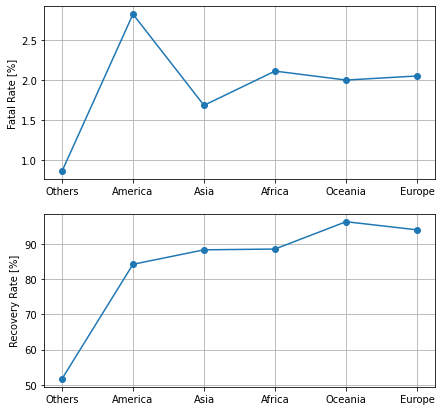

In [150]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(211)
ax1.plot(x,y1, 'o-')
ax1.set_ylabel("Fatal Rate [%]")
ax1.grid()
ax2 = fig.add_subplot(212)
ax2.plot(x,y2, 'o-')
ax2.set_ylabel("Recovery Rate [%]")
ax2.grid()